In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:

x=np.array([0.5,0.75,1.00,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.5])
y=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

alpha=0.1
alpha1=0.00001
e=2.7182818
b=np.array([0,0.1])
b2=np.array([0,0.1])

temp=[]
temp2=[]

n = x.size

for i in range(10000):
  temp=[ b[0] + alpha * np.sum( y   -       e**(b[0]+b[1]*x) / (1+e**(b[0]+b[1]*x) )  ),
         b[1] + alpha * np.sum( x*y - ( x * e**(b[0]+b[1]*x) / (1+e**(b[0]+b[1]*x) ) ))  ]
  b=temp


print(temp,end='\n')

[-5.454920875742599, 1.5470492487200302]
[0.002146404642532772, 0.10529203236673008]


In [ ]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-(item*b[1]+b[0]))))
    return a

In [ ]:
def sigm(x):
    a=(1/(1+math.exp(-(x*b[1]+b[0]))))
    return a

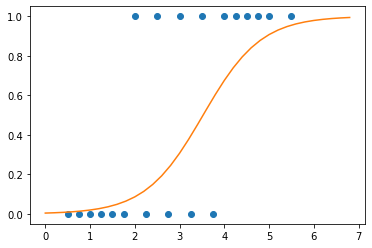

In [ ]:
plt.plot(x,y,'o')
t = np.arange(0, 7., 0.2)
sig = sigmoid(t)
plt.plot(t,sig)
plt.show()

In [ ]:
res=[]
for i in x:
  if sigm(i)<0.5:
    res.append(0)
  else:
    res.append(1)
res=np.array(res)
#print(y)
#print(res)
res=res.reshape(-1,1)
y1=y
y1=y1.reshape(-1,1)
res=np.concatenate((res,y1),axis=1)
#print(res)
tn=0
tp=0
fn=0
fp=0
tup=(res,y)
for i in res:
  if(i[0]==i[1] and i[0]==0):
    tn+=1
  elif(i[0]==i[1] and i[0]==1):
    tp+=1
  elif(i[0]!=i[1] and i[0]==0):
    fn+=1
  else:
    fp+=1

confusion=np.array([[tn,fp],[fn,tp]])
print(confusion)

accuracy=(tp+tn)/(x.size)
print("Accuracy = ",accuracy)

pre= [tn/(tn+fn),tp/(tp+fp) ]
print("Precision of 0: ",pre[0],"\nPrecision of 1: ",pre[1])

r=[tn/(tn+fp),tp/(tp+fn)]
print("Precision of 0: ",r[0],"\nPrecision of 1: ",r[1])

[[9 1]
 [4 6]]
Accuracy =  0.75
Precision of 0:  0.6923076923076923 
Precision of 1:  0.8571428571428571
Precision of 0:  0.9 
Precision of 1:  0.6


In [ ]:
for j in range(len(x)):
  print(x[j],'\t',sigm(x[j]),'\t',y[j])

0.5 	 0.009180995372598727 	 0
0.75 	 0.013457976570929226 	 0
1.0 	 0.01968780599796986 	 0
1.25 	 0.028717537802459503 	 0
1.5 	 0.04171249962396346 	 0
1.75 	 0.060223202809673054 	 0
2.0 	 0.08620938768007111 	 1
2.25 	 0.12195346389756176 	 0
2.5 	 0.16976442375143888 	 1
2.75 	 0.231379978083737 	 0
3.0 	 0.3070870479910621 	 1
3.25 	 0.3948403462080514 	 0
3.5 	 0.48993923181293214 	 1
3.75 	 0.5857719316860748 	 0
4.0 	 0.675523782255611 	 1
4.25 	 0.7539958449941503 	 1
4.5 	 0.8185865931448189 	 1
4.75 	 0.8691612543764433 	 1
5.0 	 0.9072344335080447 	 1
5.5 	 0.9549484509434332 	 1


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
X=x.reshape(-1,1)
clf.fit(X, y)
print(clf.score(X, y))
print(clf.predict(X))

0.8
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(clf.coef_)

[[1.15464451]]
